In [ ]:
# i248016_i248005_24i4030_Assignment 01.ipynb
# Name: Warda Sheikh
# Student ID: 24i-8016
# Name: Eeman Ahmed
# Student ID: 24i-8005
# Name: Muhammad Ahsan
# Student ID: 24i-8030
# Assignment: ML Assignment 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# **Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning for DS/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Phase 1: Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.shape

(569, 33)

# Identify columns with missing values

In [ ]:
# Identify columns with missing data
missing_columns = df.columns[df.isnull().any()]

print("Columns with missing data:", missing_columns.tolist())

# To check the count of missing values in each column
print(df.isnull().sum())

Columns with missing data: ['Unnamed: 32']
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst             

In [ ]:
# Remove columns with any missing values
df.dropna(axis=1, inplace=True)
print("\nDataFrame after dropping columns with missing values:\n", df)


DataFrame after dropping columns with missing values:
            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54   

In [ ]:
# Count duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Display duplicate rows
df[df.duplicated()]

Duplicate Rows: 0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
print("Number of unique classes:", df['diagnosis'].nunique())
print(df['diagnosis'].value_counts())

Number of unique classes: 2
diagnosis
B    357
M    212
Name: count, dtype: int64


# Applying Label Encoding

In [ ]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
print(df)

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
#Checking null values
print(df.isnull().sum)

<bound method DataFrame.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean

# **Visualize Class Distribution**

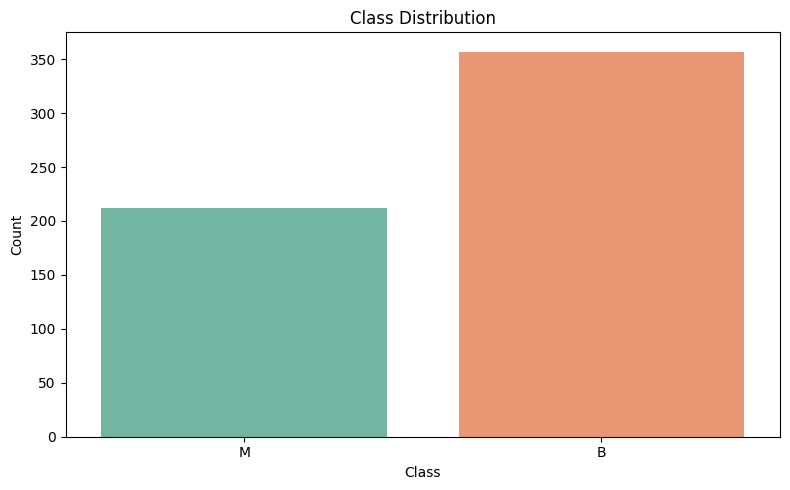

In [ ]:
#Plotting countplot for visualizing the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='Set2', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Correlation Analysis**

> Add blockquote



In [ ]:
corr_matrix = df.corr()
fdw_corr = corr_matrix['diagnosis']
corr = fdw_corr.sort_values(ascending=False)
print(corr)

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<Axes: >

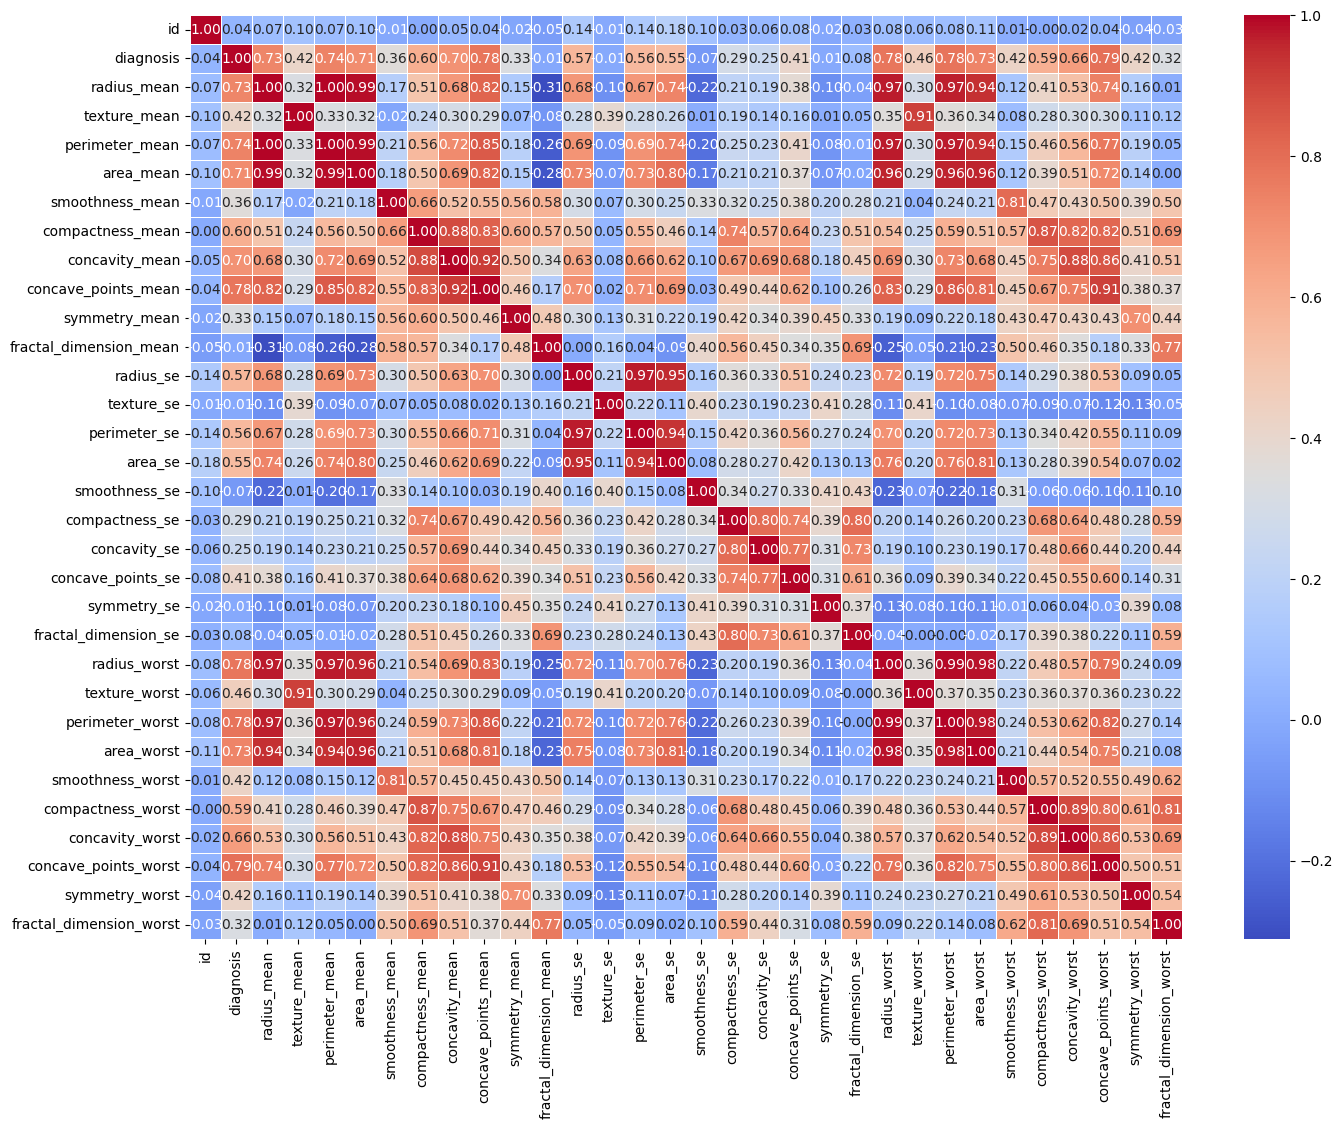

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=False)

# **Outlier Identification**

In [ ]:
iso = IsolationForest(contamination=0.02)
outliers = iso.fit_predict(df.select_dtypes(include=[np.number]))
# -1 means outlier
df['outlier'] = outliers
outlier_rows = df[df['outlier'] == -1]
print(outlier_rows)

            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
3     84348301          1       11.420         20.38           77.58   
12      846226          1       19.170         24.80          132.40   
78     8610862          1       20.180         23.97          143.70   
82     8611555          1       25.220         24.91          171.50   
108      86355          1       22.270         19.67          152.80   
122     865423          1       24.250         20.20          166.20   
152    8710441          0        9.731         15.34           63.78   
180     873592          1       27.220         21.87          182.10   
212    8810703          1       28.110         18.47          188.50   
258     887181          1       15.660         23.20          110.20   
352     899987          1       25.730         17.46          174.20   
461  911296202          1       27.420         26.27          186.90   

     area_mean  smoothness_mean  compactness_mean  concavity_me

In [ ]:
df.drop(columns=['outlier'], inplace=True)

# **Visualizing feature distributions**

*   List item
*   List item



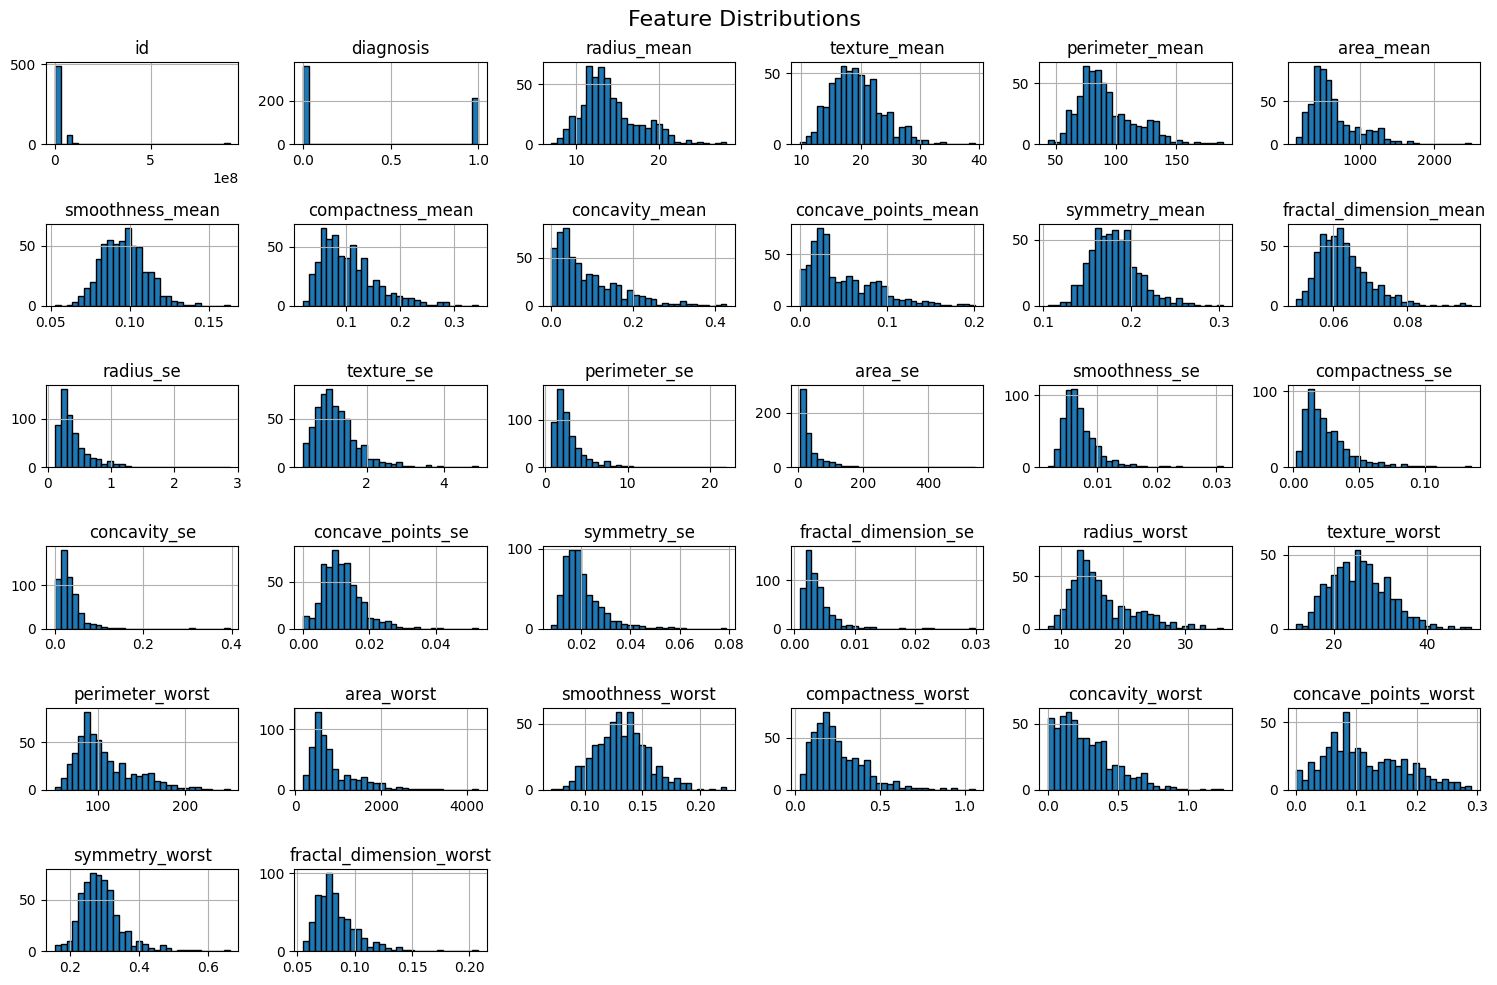

In [ ]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

Plotting: id


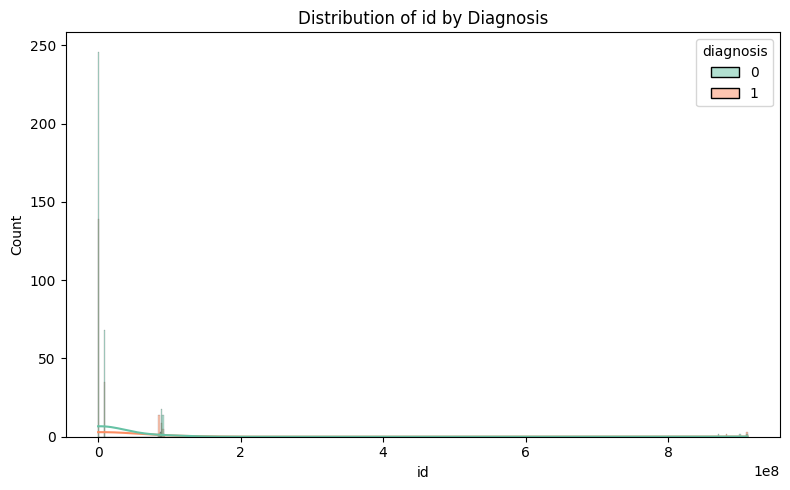

Plotting: radius_mean


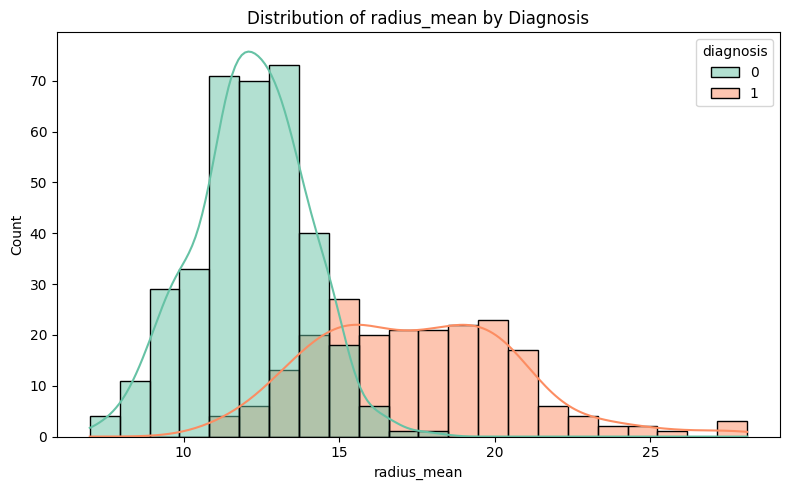

Plotting: texture_mean


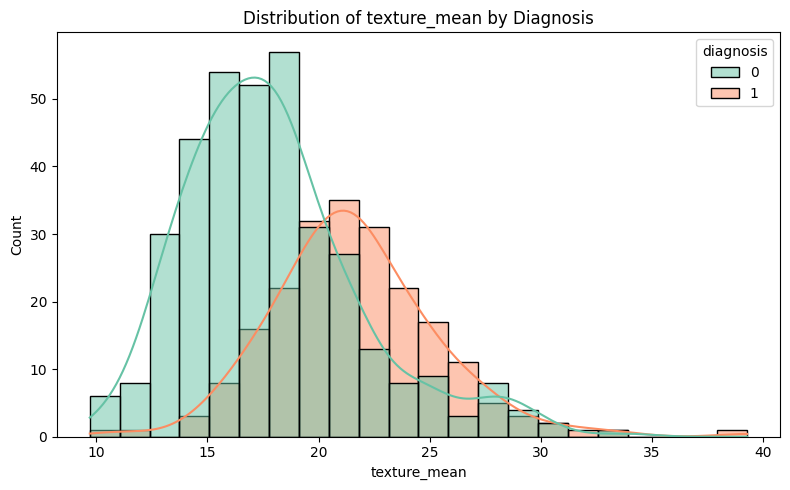

Plotting: perimeter_mean


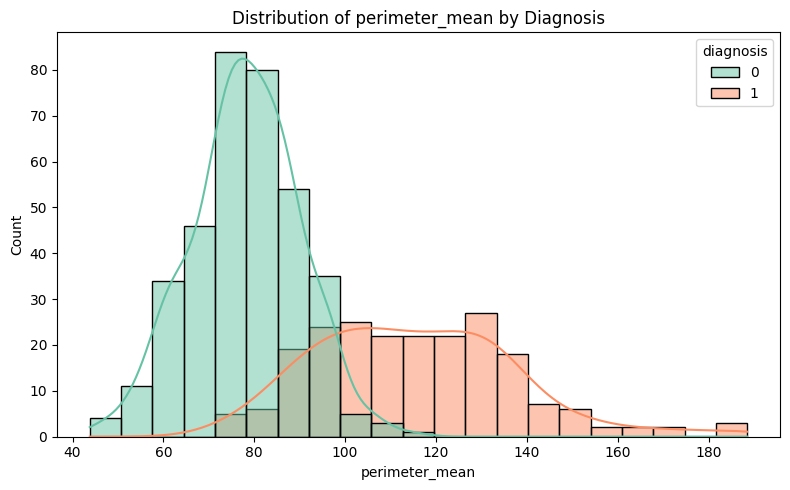

Plotting: area_mean


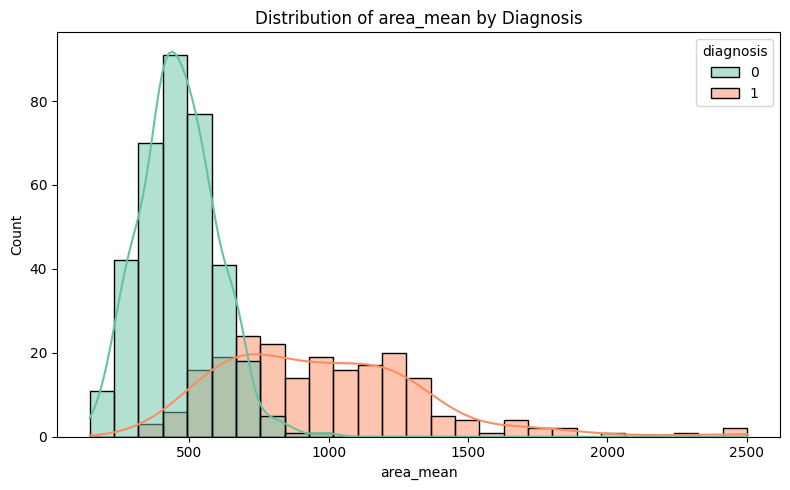

Plotting: smoothness_mean


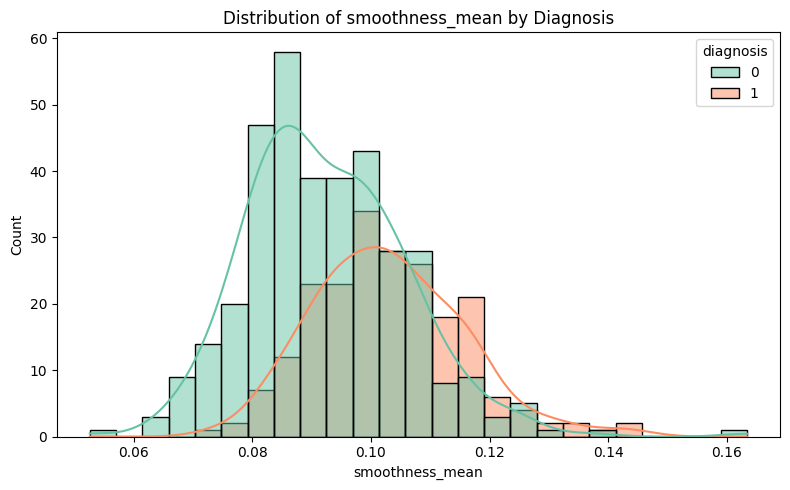

Plotting: compactness_mean


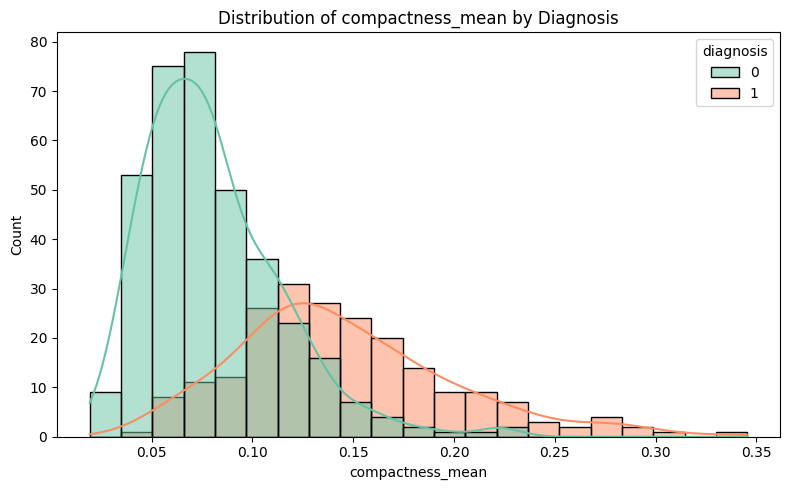

Plotting: concavity_mean


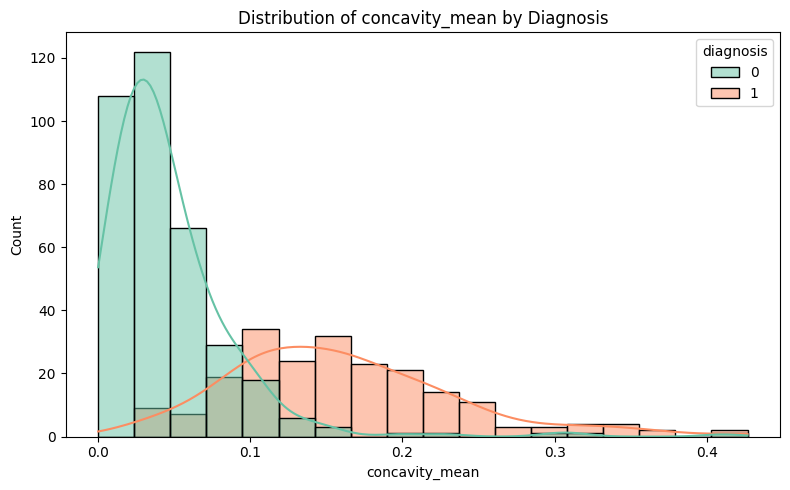

Plotting: concave_points_mean


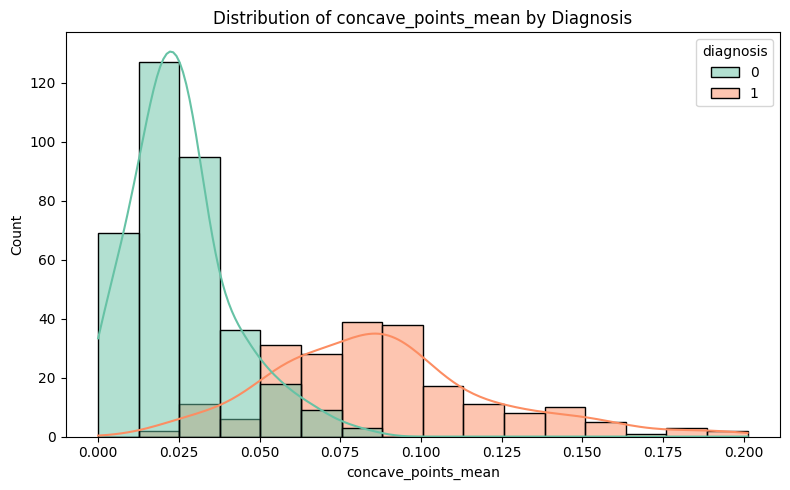

Plotting: symmetry_mean


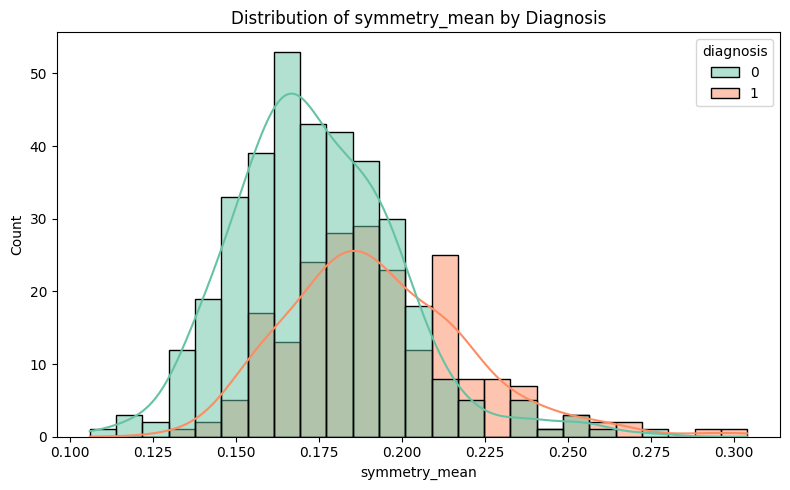

Plotting: fractal_dimension_mean


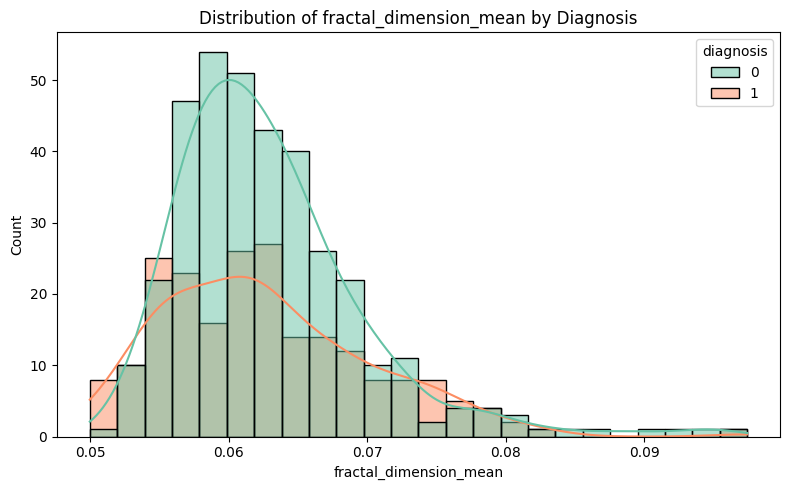

Plotting: radius_se


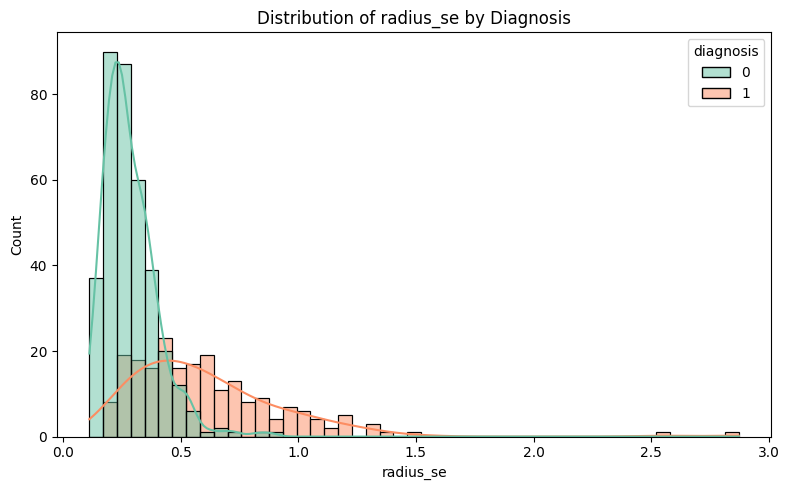

Plotting: texture_se


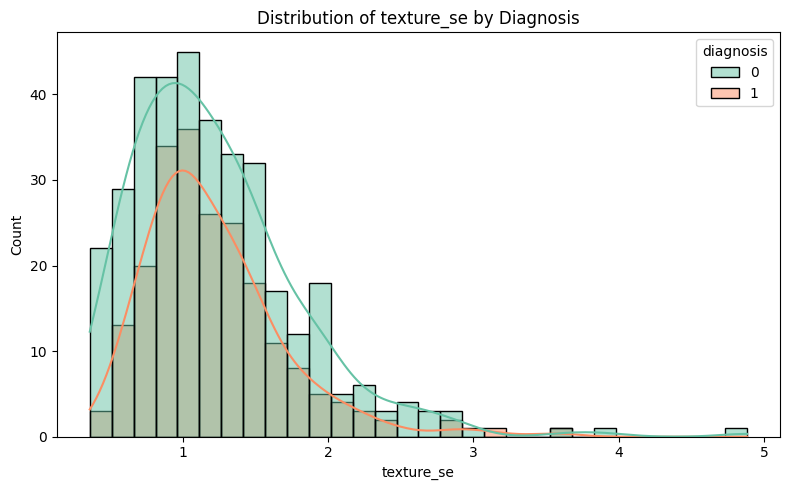

Plotting: perimeter_se


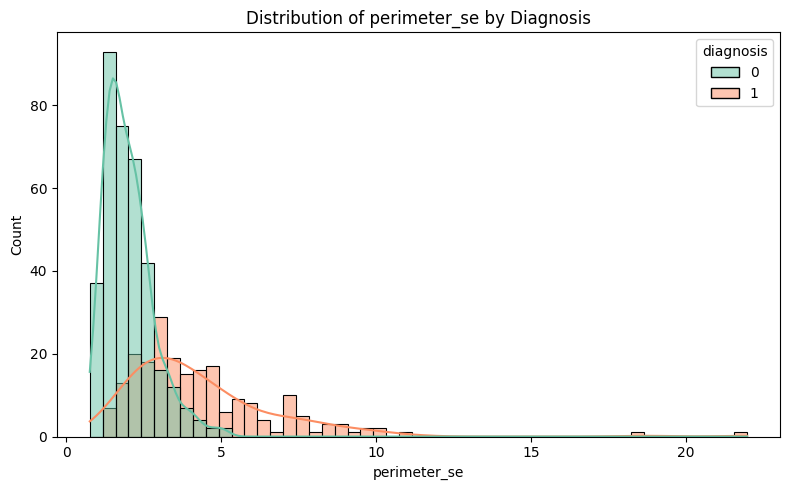

Plotting: area_se


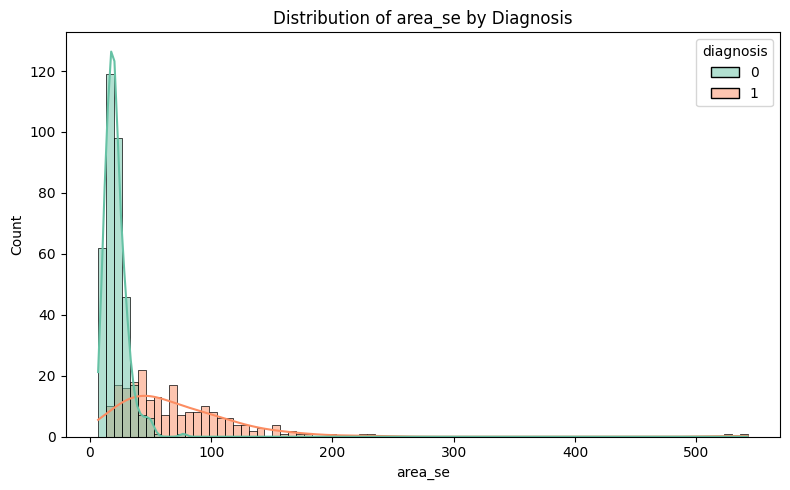

Plotting: smoothness_se


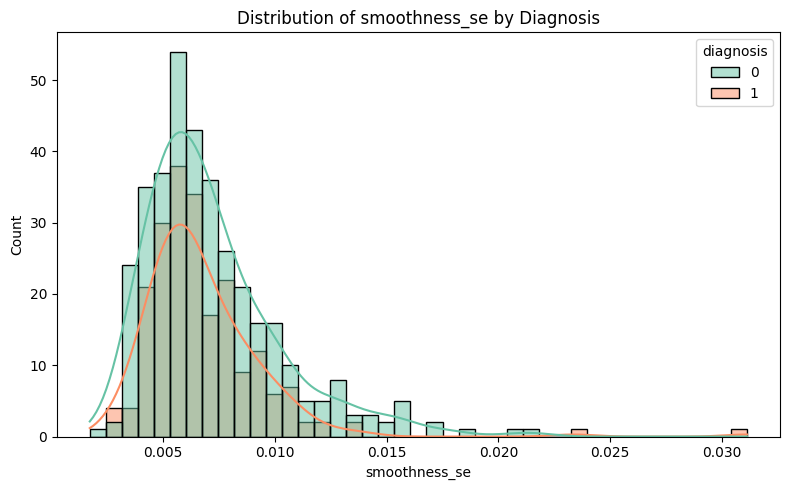

Plotting: compactness_se


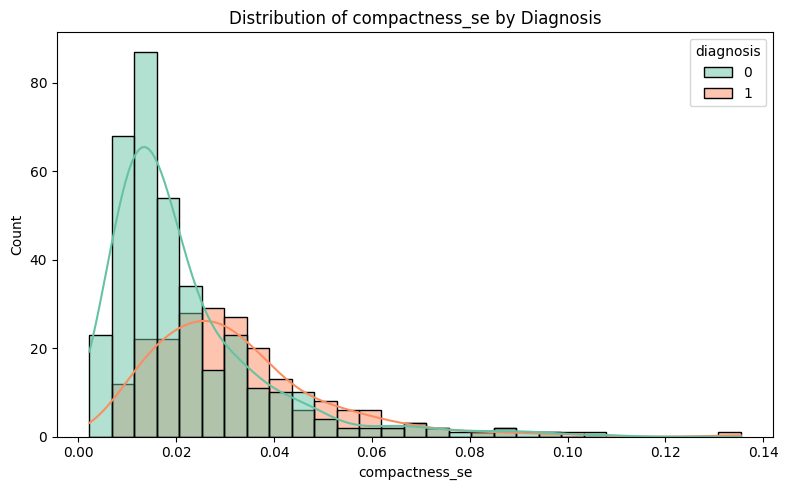

Plotting: concavity_se


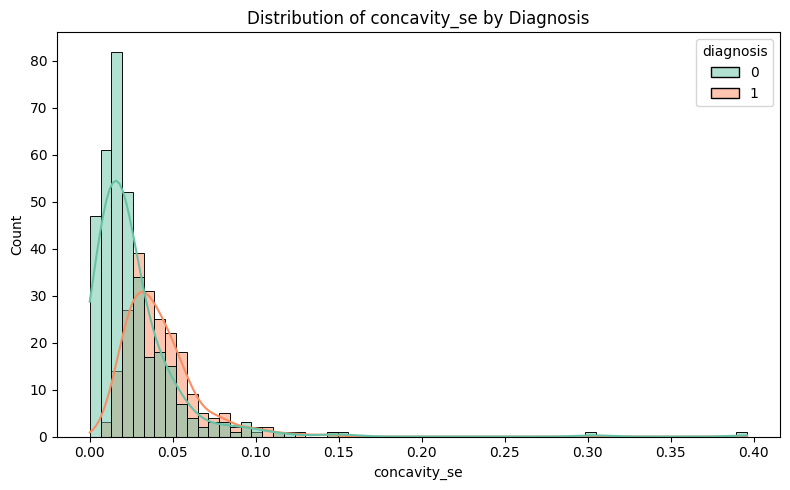

Plotting: concave_points_se


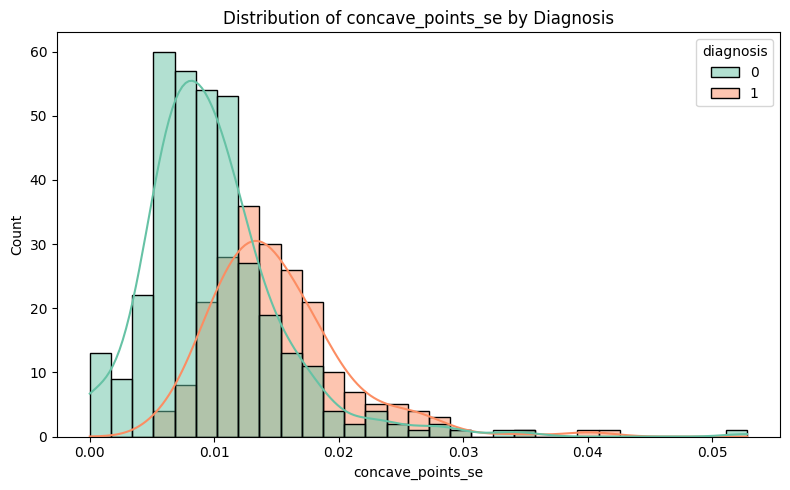

Plotting: symmetry_se


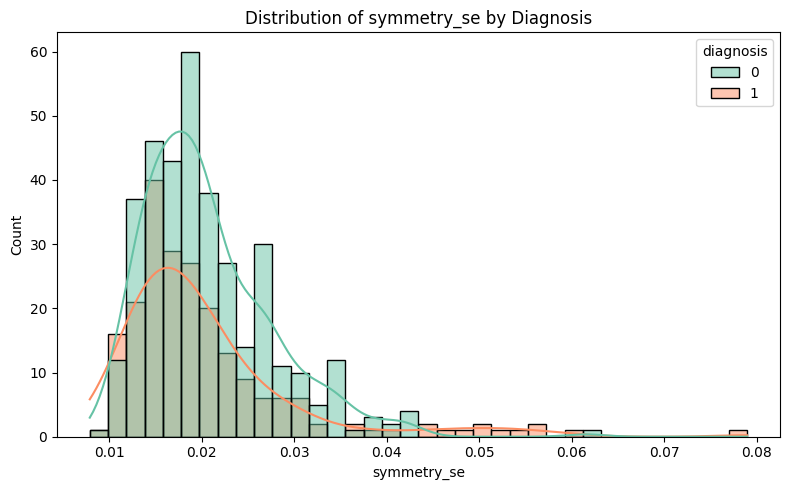

Plotting: fractal_dimension_se


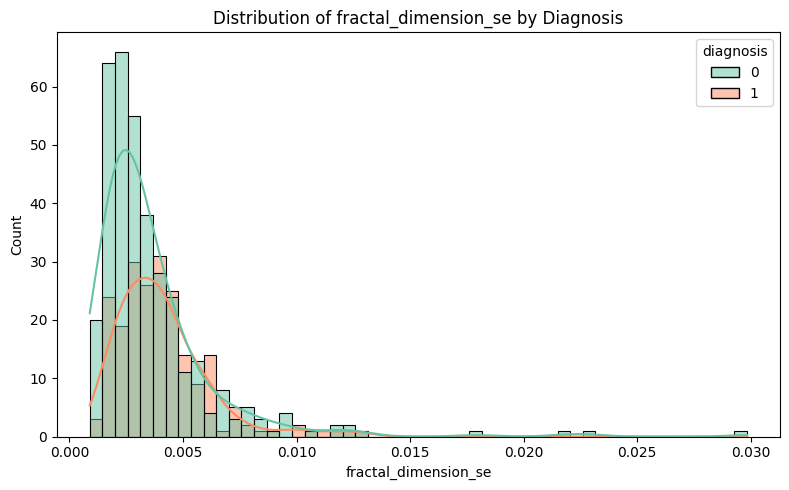

Plotting: radius_worst


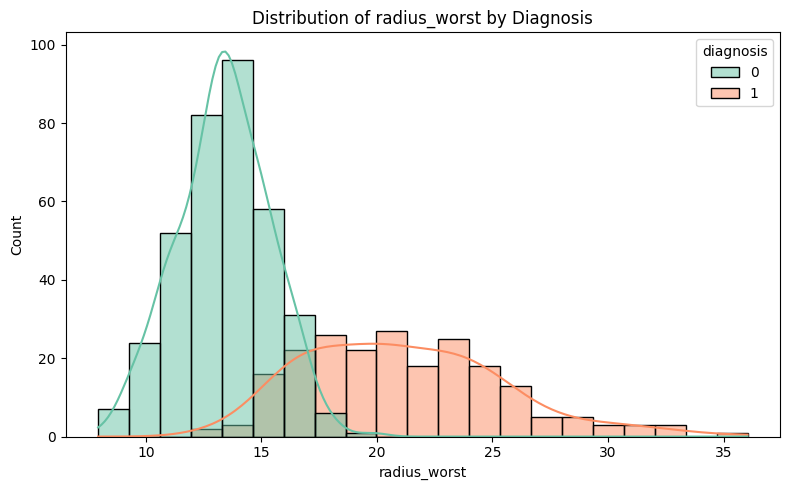

Plotting: texture_worst


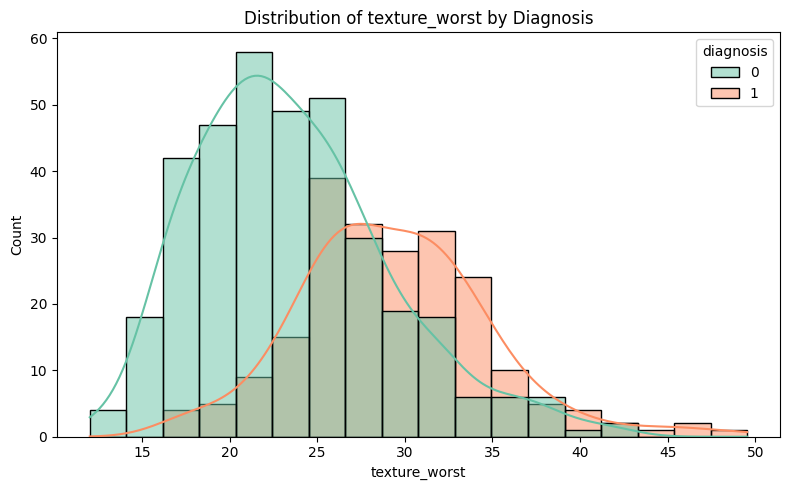

Plotting: perimeter_worst


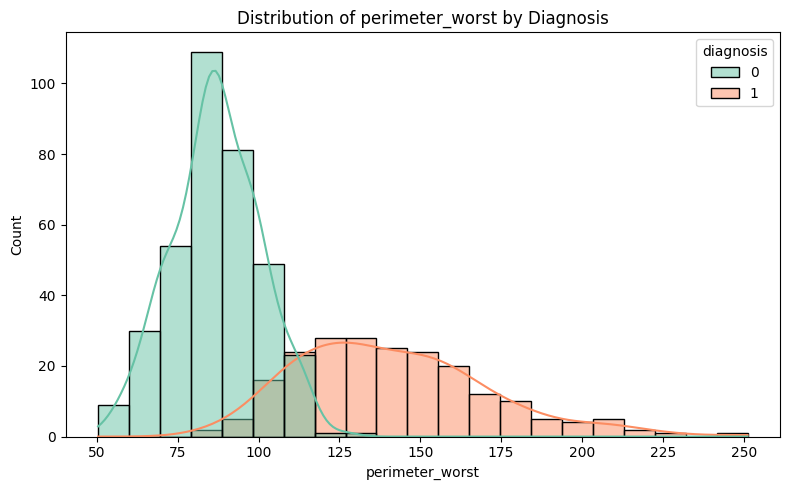

Plotting: area_worst


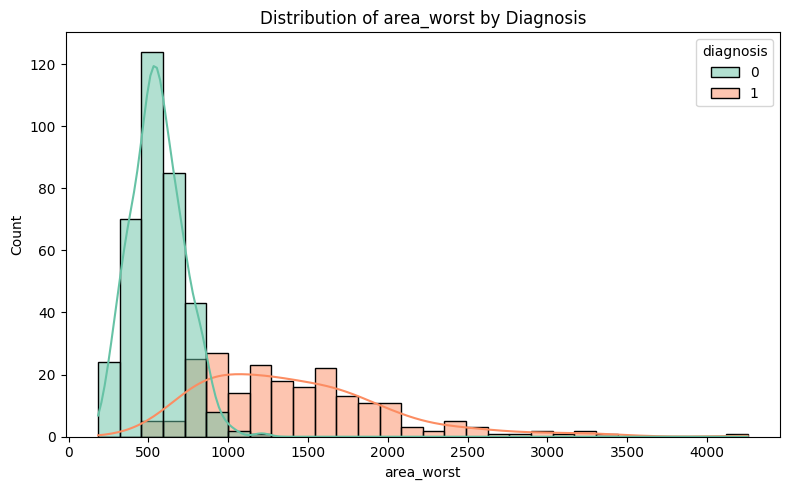

Plotting: smoothness_worst


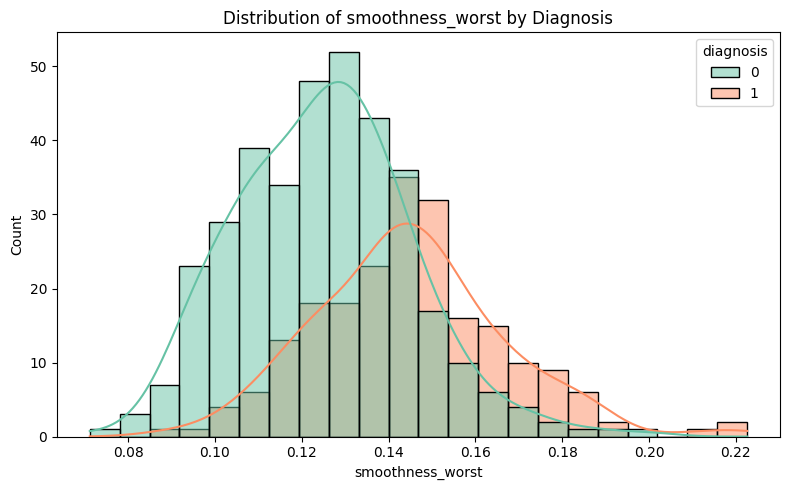

Plotting: compactness_worst


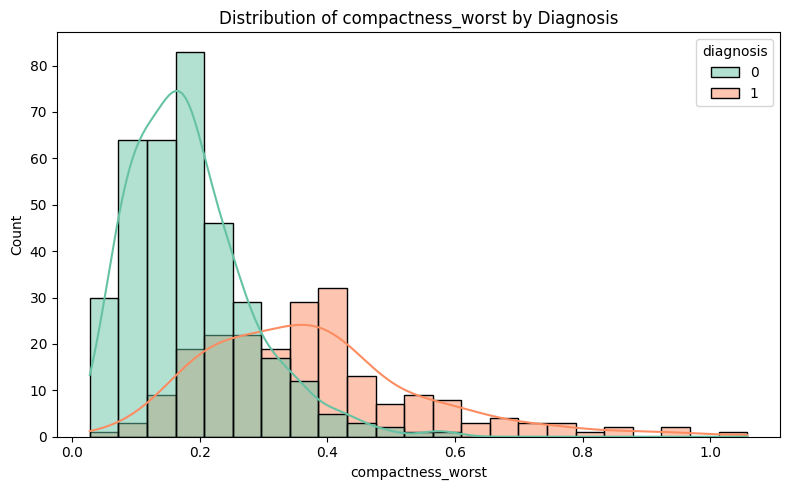

Plotting: concavity_worst


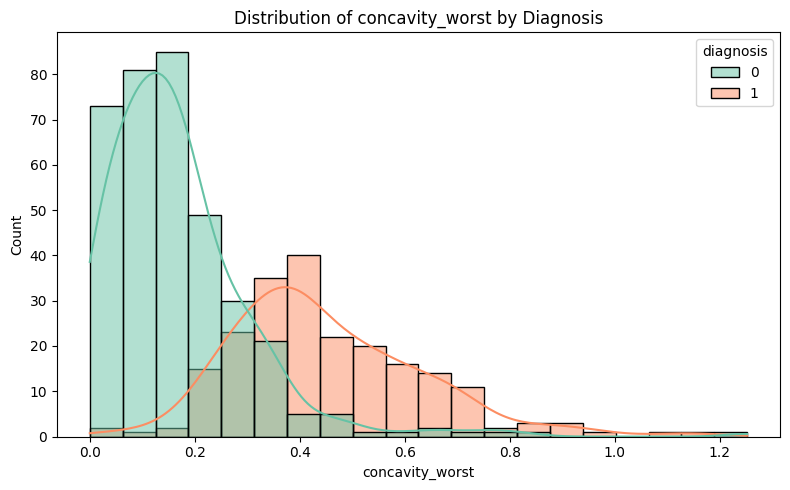

Plotting: concave_points_worst


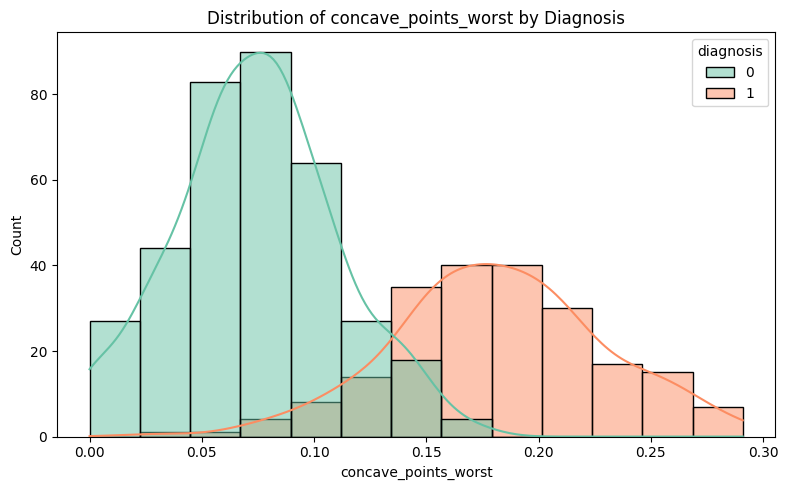

Plotting: symmetry_worst


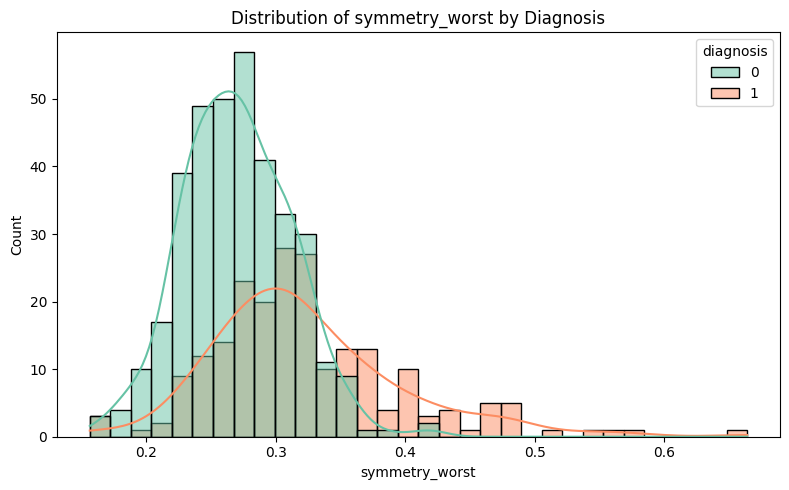

Plotting: fractal_dimension_worst


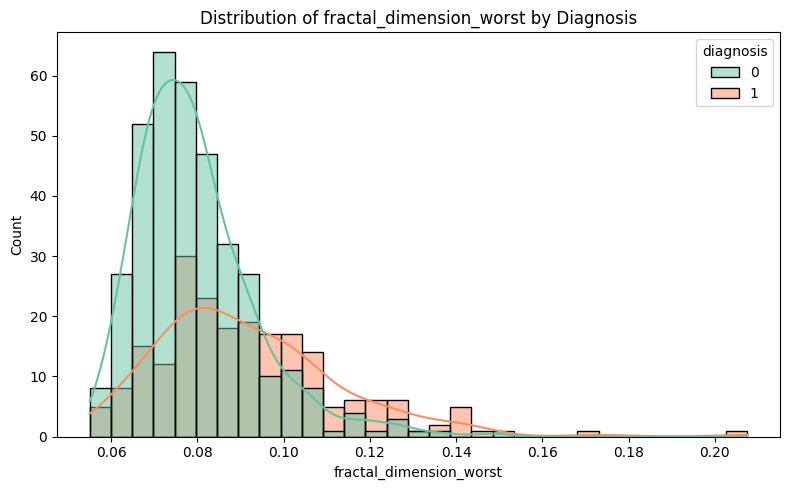

In [ ]:
feature_columns = [col for col in df.columns if col != 'diagnosis']
for feature in feature_columns:
    print(f"Plotting: {feature}")
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='Set2')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


# **Normalize the Data Set**

In [ ]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'diagnosis']  # Exclude 'diagnosis'

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# **Split data into training & testing sets**

In [ ]:
# Step 1: Separate features and target
X = df.drop(columns=['id','diagnosis'])  # Features
y = df['diagnosis']                 # Target

# Step 2: Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Phase 2: PCA for dimensionality reduction**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance ratio and cumulative variance
print("Explained variance ratio per component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# Number of components selected
print("Number of components selected to retain 95% variance:", pca.n_components_)

Explained variance ratio per component: [0.45182689 0.18362334 0.09564943 0.06375645 0.05609276 0.03923136
 0.02230015 0.01550017 0.01283073 0.01153678]
Cumulative explained variance: [0.45182689 0.63545024 0.73109967 0.79485612 0.85094888 0.89018024
 0.91248039 0.92798057 0.9408113  0.95234808]
Number of components selected to retain 95% variance: 10


# **Visualize the data in 2D using the first two principal components**

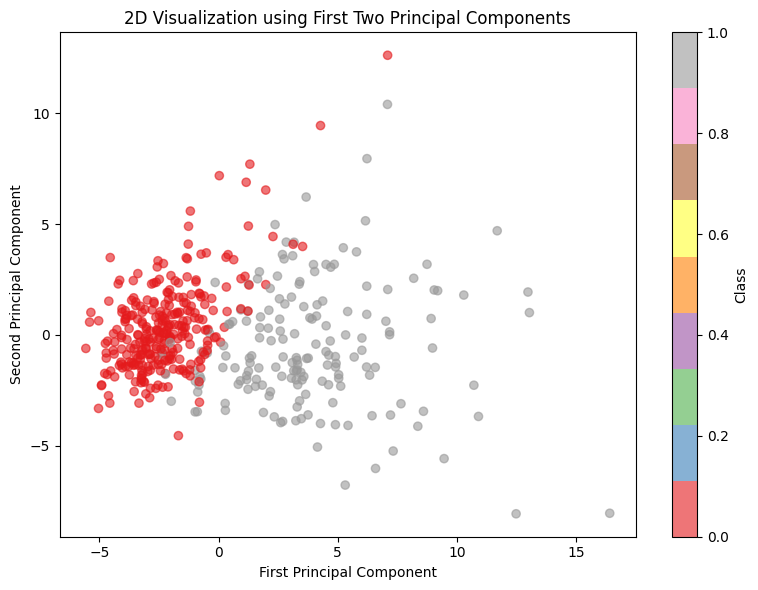

In [ ]:
# Apply PCA to reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='Set1', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Visualization using First Two Principal Components')
plt.colorbar(scatter, label='Class')
plt.tight_layout()
plt.show()

# **3A. Training SVM On Original Dataset**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# SVM with hyperparameter tuning on original dataset
SVM = SVC()

# Hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Grid search to find the best hyperparameters
grid_search_SVM = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy')
grid_search_SVM.fit(X_train, y_train)

# Best parameters and model
print("Best hyperparameters for original dataset:", grid_search_SVM.best_params_)

# Prediction on the original test set
y_pred_SVM = grid_search_SVM.predict(X_test)

# Evaluate performance
print("Classification Report (Original Dataset):")
print(classification_report(y_test, y_pred_SVM))

accuracy_original = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy (Original Dataset): {accuracy_original:.4f}")


Best hyperparameters for original dataset: {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report (Original Dataset):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy (Original Dataset): 0.9561


# **3B. Training SVM On PCA-Transformed Dataset**

In [ ]:
# Applied PCA already
# SVM with hyperparameter tuning on PCA-transformed dataset
SVM_pca = SVC()

# Grid search to find the best hyperparameters for PCA data
grid_search_SVM_pca = GridSearchCV(SVM_pca, param_grid, cv=5, scoring='accuracy')
grid_search_SVM_pca.fit(X_train_pca, y_train)

# Best parameters and model
print("Best hyperparameters for PCA-transformed dataset:", grid_search_SVM_pca.best_params_)

# Prediction on the PCA test set
y_pred_SVM_pca = grid_search_SVM_pca.predict(X_test_pca)

# Evaluate performance
print("Classification Report (PCA-transformed Dataset):")
print(classification_report(y_test, y_pred_SVM_pca))

accuracy_pca = accuracy_score(y_test, y_pred_SVM_pca)
print(f"Accuracy (PCA-transformed Dataset): {accuracy_pca:.4f}")

Best hyperparameters for PCA-transformed dataset: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report (PCA-transformed Dataset):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy (PCA-transformed Dataset): 0.9825


# **3C. Comparison of Performance**

In [ ]:
# Compare accuracies
print(f"Comparison of Accuracy: \nOriginal Dataset: {accuracy_original:.4f} vs PCA Dataset: {accuracy_pca:.4f}")

Comparison of Accuracy: 
Original Dataset: 0.9561 vs PCA Dataset: 0.9825


# **3D. Comparison across different Kernels**

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = []

for kernel in kernels:
    print(f"\nTraining SVM with kernel = {kernel}")

    # Create and fit the model
    model = SVC(kernel=kernel, C=1, gamma='scale')
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Store macro avg scores (good for imbalanced classes)
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\n ------ SVM Performance Comparison by Kernel-----")
print(results_df)


Training SVM with kernel = linear

Training SVM with kernel = rbf

Training SVM with kernel = poly

Training SVM with kernel = sigmoid

 ------ SVM Performance Comparison by Kernel-----
    Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.964912   0.973684  0.952381  0.961486
1      rbf  0.973684   0.980000  0.964286  0.971277
2     poly  0.885965   0.923529  0.845238  0.867049
3  sigmoid  0.947368   0.953947  0.933532  0.942230


# **4A. Training Decision Tree On Original Dataset**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

DT = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(DT, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Predictions
y_pred_DT = grid_search_dt.predict(X_test)

# Evaluation
print("Best Parameters (Original):", grid_search_dt.best_params_)
print("Classification Report (Original Dataset):")
print(classification_report(y_test, y_pred_DT))

accuracy_df = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy (PCA-transformed Dataset): {accuracy_df:.4f}")

Best Parameters (Original): {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report (Original Dataset):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy (PCA-transformed Dataset): 0.9474


# **4B. Training Decision Tree On PCA-Transformed Dataset**

In [ ]:
DT_pca = DecisionTreeClassifier(random_state=42)
grid_search_DT_pca = GridSearchCV(DT_pca, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_DT_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_DT_pca = grid_search_DT_pca.predict(X_test_pca)

# Evaluation
print("Best Parameters (PCA):", grid_search_DT_pca.best_params_)
print("Classification Report (PCA-Transformed Dataset):")
print(classification_report(y_test, y_pred_DT_pca))

accuracy_df_pca = accuracy_score(y_test, y_pred_DT_pca)
print(f"Accuracy (PCA-transformed Dataset): {accuracy_df_pca:.4f}")

Best Parameters (PCA): {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report (PCA-Transformed Dataset):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy (PCA-transformed Dataset): 0.9649


# **4C. Comparison of Performance**

In [ ]:
# Compare accuracies
print(f"Comparison of Accuracy: \nOriginal Dataset: {accuracy_df:.4f} vs PCA Dataset: {accuracy_df_pca:.4f}")

Comparison of Accuracy: 
Original Dataset: 0.9474 vs PCA Dataset: 0.9649


# **4D. Compare results with and without pruning**

In [ ]:
# Without pruning: Train decision tree without restrictions
dt_no_prune = DecisionTreeClassifier(random_state=42)
dt_no_prune.fit(X_train, y_train)

# Predict on test set
y_pred_no_prune = dt_no_prune.predict(X_test)

# Evaluate performance without pruning
print("Classification Report (Without Pruning):")
print(classification_report(y_test, y_pred_no_prune))
accuracy_no_prune = accuracy_score(y_test, y_pred_no_prune)
print(f"Accuracy (Without Pruning): {accuracy_no_prune:.4f}")


# With pruning: Train decision tree with maximum depth, minimum samples per split
dt_prune = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_prune.fit(X_train, y_train)

# Predict on test set
y_pred_prune = dt_prune.predict(X_test)

# Evaluate performance with pruning
print("\nClassification Report (With Pruning):")
print(classification_report(y_test, y_pred_prune))
accuracy_prune = accuracy_score(y_test, y_pred_prune)
print(f"Accuracy (With Pruning): {accuracy_prune:.4f}")

Classification Report (Without Pruning):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy (Without Pruning): 0.9298

Classification Report (With Pruning):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy (With Pruning): 0.9386


# **5A. Training Neural Networks On Original Dataset**

In [ ]:
#!pip install scikeras[tensorflow]
#!pip install scikeras --upgrade

!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

def build_model(hp):
    model = Sequential()

    # Input + first layer
    model.add(Dense(
        units=hp.Choice('units_input', [16, 32, 64, 128]),
        activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1],)
    ))

    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 2, 3)):
        model.add(Dense(
            units=hp.Choice(f'units_{i}', [16, 32, 64, 128]),
            activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
        ))
        model.add(Dropout(rate=hp.Choice('dropout', [0.2, 0.5])))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Choose optimizer and learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    lr = hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
    optimizer = {'adam': Adam(lr), 'sgd': SGD(lr), 'rmsprop': RMSprop(lr)}[opt_choice]

    model.compile(
        optimizer=optimizer,
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model



tuner_NN = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='nn_tuning_NN'
)

tuner_NN.search(X_train, y_train,
                      epochs=50,
                      validation_split=0.2,
                      batch_size=32,
                      verbose=1)

best_nn_NN = tuner_NN.get_best_models(num_models=1)[0]

best_hp = tuner_NN.get_best_hyperparameters(1)[0]

# Print the best hyperparameters
print("Best Hyperparameters for the Original Dataset:")
print(f"Units in input layer: {best_hp['units_input']}")
print(f"Activation function: {best_hp['activation']}")
print(f"Number of hidden layers: {best_hp['num_hidden_layers']}")
for i in range(best_hp['num_hidden_layers']):
    print(f"Units in hidden layer {i+1}: {best_hp[f'units_{i}']}")
    print(f"Dropout rate in hidden layer {i+1}: {best_hp['dropout']}")
print(f"Optimizer: {best_hp['optimizer']}")
print(f"Learning rate: {best_hp['learning_rate']}")

loss_orig, acc_orig = best_nn_NN.evaluate(X_test, y_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Original Data - Test Accuracy: {acc_orig:.4f}")


Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.9670329689979553

Best val_accuracy So Far: 0.9890109896659851
Total elapsed time: 00h 02m 02s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters for the Original Dataset:
Units in input layer: 16
Activation function: sigmoid
Number of hidden layers: 1
Units in hidden layer 1: 64
Dropout rate in hidden layer 1: 0.5
Optimizer: adam
Learning rate: 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9794 - loss: 0.1167 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Original Data - Test Accuracy: 0.9825


# **5B. Training Neural Networks On PCA-Transformed Dataset**

In [ ]:
def build_model(hp):
    model = Sequential()

    # Input + first layer
    model.add(Dense(
        units=hp.Choice('units_input', [16, 32, 64, 128]),
        activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train_pca.shape[1],)
    ))

    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Choice(f'units_{i}', [16, 32, 64, 128]),
            activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
        ))
        model.add(Dropout(rate=hp.Choice('dropout', [0.2, 0.5])))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Choose optimizer and learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    lr = hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
    optimizer = {'adam': Adam(lr), 'sgd': SGD(lr), 'rmsprop': RMSprop(lr)}[opt_choice]

    model.compile(
        optimizer=optimizer,
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model


# Use the same model builder
tuner_NN_pca  = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='nn_tuning_pca'
)

tuner_NN_pca.search(X_train_pca, y_train,
                 epochs=50,
                 validation_split=0.2,
                 batch_size=32,
                 verbose=1)

best_NN_pca = tuner_NN_pca.get_best_models(num_models=1)[0]

best_hp = tuner_NN.get_best_hyperparameters(1)[0]

# Print the best hyperparameters
print("Best Hyperparameters for the PCA_Transformed Dataset:")
print(f"Units in input layer: {best_hp['units_input']}")
print(f"Activation function: {best_hp['activation']}")
print(f"Number of hidden layers: {best_hp['num_hidden_layers']}")
for i in range(best_hp['num_hidden_layers']):
    print(f"Units in hidden layer {i+1}: {best_hp[f'units_{i}']}")
    print(f"Dropout rate in hidden layer {i+1}: {best_hp['dropout']}")
print(f"Optimizer: {best_hp['optimizer']}")
print(f"Learning rate: {best_hp['learning_rate']}")


loss_pca, acc_pca = best_NN_pca.evaluate(X_test_pca, y_test)
print("Classification Report (PCA-Transformed Dataset):")
print(classification_report(y_test, y_pred))

print(f"PCA Data - Test Accuracy: {acc_pca:.4f}")

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.9670329689979553

Best val_accuracy So Far: 0.9890109896659851
Total elapsed time: 00h 02m 03s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters for the PCA_Transformed Dataset:
Units in input layer: 16
Activation function: sigmoid
Number of hidden layers: 1
Units in hidden layer 1: 64
Dropout rate in hidden layer 1: 0.5
Optimizer: adam
Learning rate: 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9554 - loss: 0.2405 
Classification Report (PCA-Transformed Dataset):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

PCA Data - Test Accuracy: 0.9561


**5C. Comparison of Performance**

In [ ]:
# Compare accuracies
print(f"Comparison of Accuracy: \nOriginal Dataset: {acc_orig:.4f} vs PCA Dataset: {acc_pca:.4f}")

Comparison of Accuracy: 
Original Dataset: 0.9825 vs PCA Dataset: 0.9561


# **6. Model Comparisons**

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree

# Define helper function
def evaluate_model(name, model, X_test, y_test, y_pred, y_prob=None):
    print(f"--- {name} ---")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob if y_prob is not None else y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}\n")
    return [acc, prec, rec, f1, roc]

# Store results
metrics = {}
times = {}

# --- Model Predictions and Time Tracking ---
models = {
    "SVM_Original": grid_search_SVM,
    "SVM_PCA": grid_search_SVM_pca,
    "DT_Original": grid_search_dt,
    "DT_PCA": grid_search_DT_pca,
    "NN_Original": best_nn_NN,
    "NN_PCA": best_NN_pca,
}

test_sets = {
    "Original": (X_test, y_test),
    "PCA": (X_test_pca, y_test),
}

# --- Evaluate Classical Models (SVM, DT) ---
for name, model in models.items():
    if 'NN' not in name:
        is_pca = 'PCA' in name
        X_t, y_t = test_sets["PCA"] if is_pca else test_sets["Original"]
        start = time.time()
        y_pred = model.predict(X_t)
        try:
            y_prob = model.predict_proba(X_t)[:, 1]
        except:
            y_prob = y_pred  # fallback for SVM if probability=False
        end = time.time()
        times[name] = end - start
        metrics[name] = evaluate_model(name, model, X_t, y_t, y_pred, y_prob)

# --- Evaluate Neural Networks ---
for name, model in {"NN_Original": best_nn_NN, "NN_PCA": best_NN_pca}.items():
    is_pca = 'PCA' in name
    X_t, y_t = test_sets["PCA"] if is_pca else test_sets["Original"]
    start = time.time()
    y_prob = model.predict(X_t).ravel()
    y_pred = (y_prob > 0.5).astype(int)
    end = time.time()
    times[name] = end - start
    metrics[name] = evaluate_model(name, model, X_t, y_t, y_pred, y_prob)

--- SVM_Original ---
Accuracy: 0.9561
Precision: 0.9512
Recall: 0.9286
F1-Score: 0.9398
ROC-AUC: 0.9504

--- SVM_PCA ---
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756
ROC-AUC: 0.9762

--- DT_Original ---
Accuracy: 0.9474
Precision: 0.9737
Recall: 0.8810
F1-Score: 0.9250
ROC-AUC: 0.9327

--- DT_PCA ---
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1-Score: 0.9500
ROC-AUC: 0.9484

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
--- NN_Original ---
Accuracy: 0.9825
Precision: 0.9762
Recall: 0.9762
F1-Score: 0.9762
ROC-AUC: 0.9987

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
--- NN_PCA ---
Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8810
F1-Score: 0.9367
ROC-AUC: 0.9795



In [ ]:
# Create DataFrame from metrics dictionary
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
df_metrics = pd.DataFrame(metrics, index=metric_names).T

# Round for better readability
df_metrics = df_metrics.round(4)

# Display the performance table
print("\n--- Performance Metrics Table ---")
print(df_metrics)



--- Performance Metrics Table ---
              Accuracy  Precision  Recall  F1-Score  ROC-AUC
SVM_Original    0.9561     0.9512  0.9286    0.9398   0.9504
SVM_PCA         0.9825     1.0000  0.9524    0.9756   0.9762
DT_Original     0.9474     0.9737  0.8810    0.9250   0.9327
DT_PCA          0.9649     1.0000  0.9048    0.9500   0.9484
NN_Original     0.9825     0.9762  0.9762    0.9762   0.9987
NN_PCA          0.9561     1.0000  0.8810    0.9367   0.9795


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


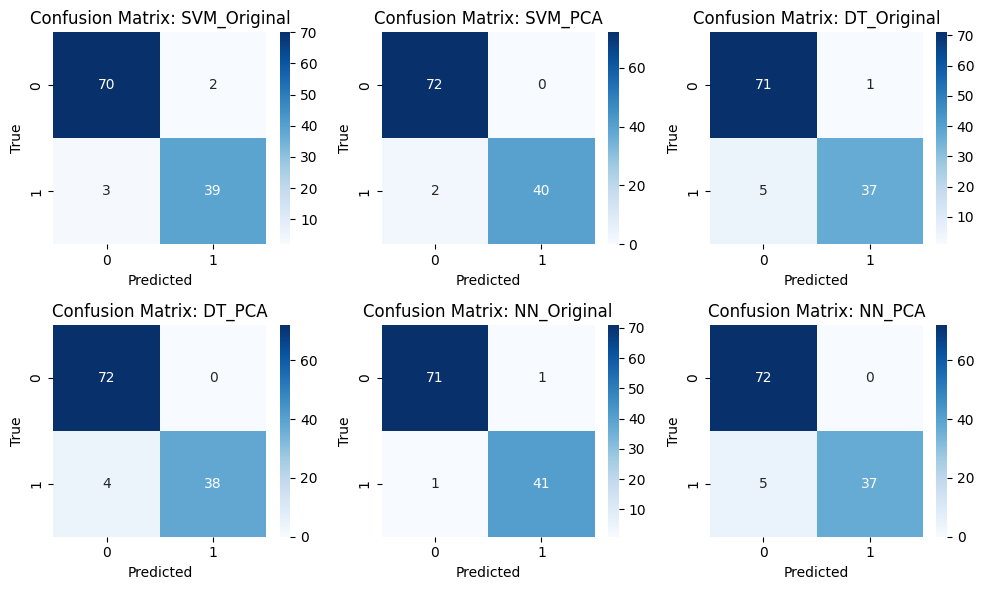

In [ ]:
# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    is_pca = 'PCA' in name
    X_t, y_t = test_sets["PCA"] if is_pca else test_sets["Original"]
    if 'NN' in name:
        y_pred = (model.predict(X_t).ravel() > 0.5).astype(int)
    else:
        y_pred = model.predict(X_t)
    cm = confusion_matrix(y_t, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
plt.tight_layout()
plt.show()

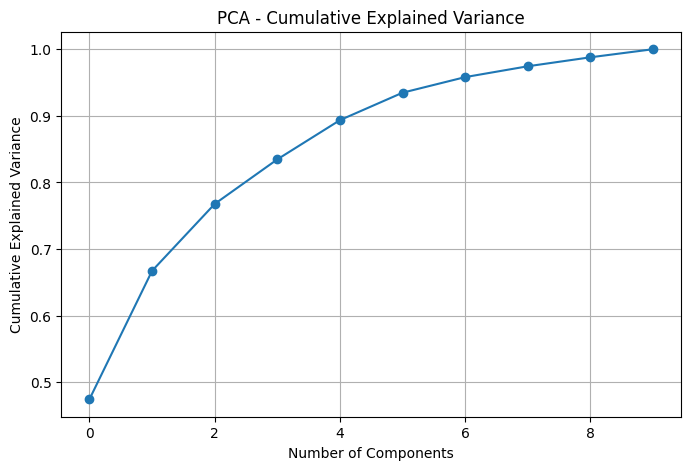

In [ ]:
# --- PCA Explained Variance Plot ---
pca = PCA()
pca.fit(X_train_pca)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


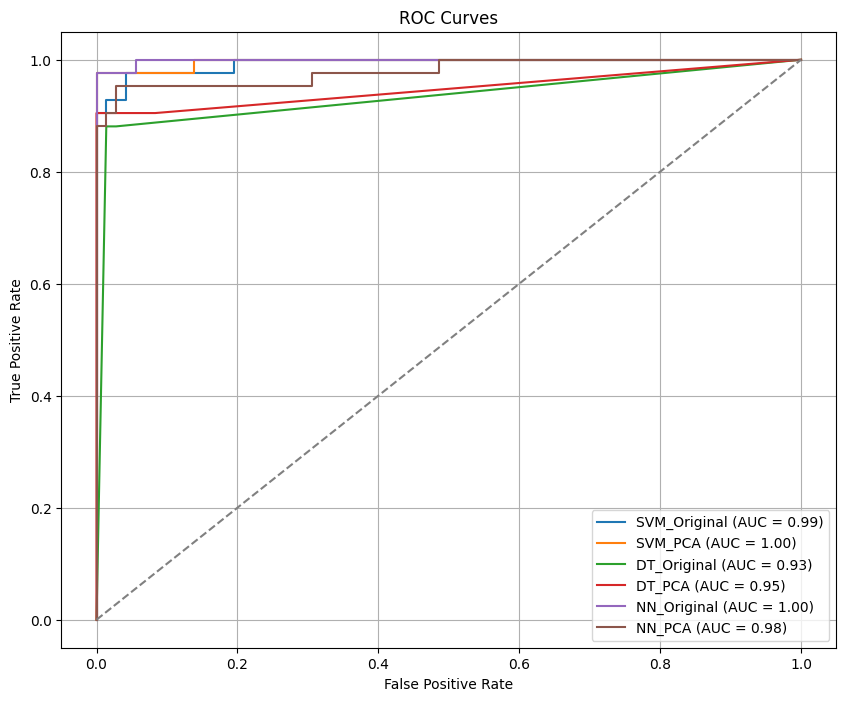

In [ ]:
# --- ROC Curves for all classifiers ---
plt.figure(figsize=(10, 8))
for name, model in models.items():
    is_pca = 'PCA' in name
    X_t, y_t = test_sets["PCA"] if is_pca else test_sets["Original"]
    if 'NN' in name:
        y_score = model.predict(X_t).ravel()
    else:
        try:
            y_score = model.predict_proba(X_t)[:, 1]
        except:
            y_score = model.decision_function(X_t)
    fpr, tpr, _ = roc_curve(y_t, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

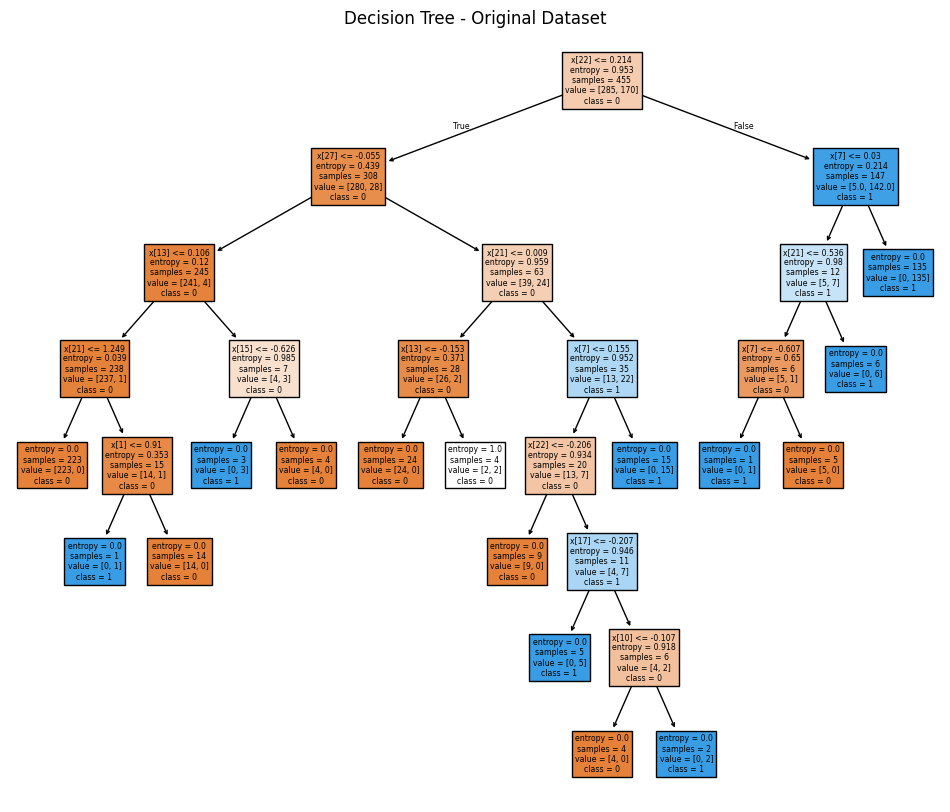

In [ ]:
# --- Decision Tree Visualization ---
plt.figure(figsize=(12, 10))
plot_tree(grid_search_dt.best_estimator_, filled=True, feature_names=None, class_names=['0', '1'])
plt.title("Decision Tree - Original Dataset")
plt.show()